In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [48]:
# Define the categories
columns = ['Tomato__Healthy', 'Tomato__Rotten']
img_size = 100

# Algorithm to load images and store them in a dictionary
images = {column: [] for column in columns}

for folder in columns:
    print('Loading --> ', folder)
    for img in os.listdir(r'C:\Users\ladyt\OneDrive\archive (5)\Fruit And Vegetable Diseases Dataset' + '/' + folder):
        image = cv2.imread(r'C:\Users\ladyt\OneDrive\archive (5)\Fruit And Vegetable Diseases Dataset' + '/' + folder + '/' + img)
        images[folder].append(image)
    print(f'Loaded {len(images[folder])} images for {folder}')



Loading -->  Tomato__Healthy
Loaded 604 images for Tomato__Healthy
Loading -->  Tomato__Rotten
Loaded 596 images for Tomato__Rotten


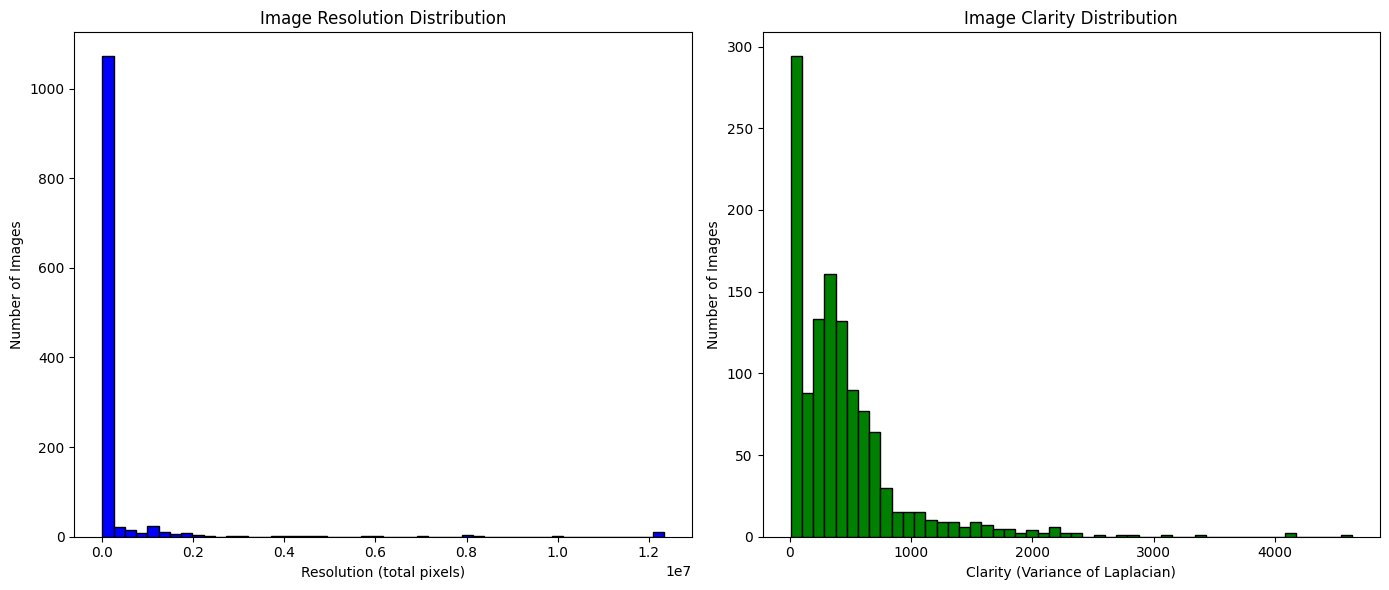

In [49]:
# Function to check image clarity using variance of Laplacian
def check_clarity(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var

# Analyze image quality
image_quality = {'Resolution': [], 'Clarity': []}

for column in columns:
    for image in images[column]:
        # Check resolution
        resolution = image.shape[0] * image.shape[1]
        image_quality['Resolution'].append(resolution)
        
        # Check clarity
        clarity = check_clarity(image)
        image_quality['Clarity'].append(clarity)

# Plot resolution and clarity histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(image_quality['Resolution'], bins=50, color='blue', edgecolor='black')
plt.title('Image Resolution Distribution')
plt.xlabel('Resolution (total pixels)')
plt.ylabel('Number of Images')

plt.subplot(1, 2, 2)
plt.hist(image_quality['Clarity'], bins=50, color='green', edgecolor='black')
plt.title('Image Clarity Distribution')
plt.xlabel('Clarity (Variance of Laplacian)')
plt.ylabel('Number of Images')

plt.tight_layout()
plt.show()


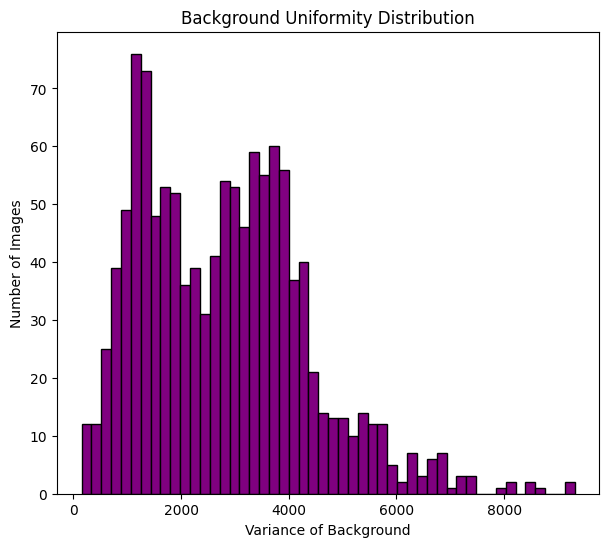

In [50]:
# Function to check background uniformity
def check_background_uniformity(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Compute variance of the background
    return np.var(gray)

# Analyze background uniformity
background_uniformity = []

for column in columns:
    for image in images[column]:
        uniformity = check_background_uniformity(image)
        background_uniformity.append(uniformity)

# Plot background uniformity histogram
plt.figure(figsize=(7, 6))
plt.hist(background_uniformity, bins=50, color='purple', edgecolor='black')
plt.title('Background Uniformity Distribution')
plt.xlabel('Variance of Background')
plt.ylabel('Number of Images')

plt.show()